Importing libraries and loading data

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import missingno as mso
from sklearn.decomposition import PCA
from abc import abstractmethod, ABC
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
import warnings

df_airlines = pd.read_csv('../datasets/airline-satisfaction.csv' , sep=',')


Deleting unnecessary data

In [2]:
df_airlines = df_airlines.drop('Unnamed: 0', axis=1)
df_airlines = df_airlines.drop('id', axis=1)

Output the head of file for verification

In [3]:
df_airlines.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,Female,Loyal Customer,52,Business travel,Eco,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,Female,Loyal Customer,36,Business travel,Business,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,Male,disloyal Customer,20,Business travel,Eco,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,Male,Loyal Customer,44,Business travel,Business,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,satisfied
5,Male,Loyal Customer,16,Business travel,Eco,311,3,3,3,3,...,5,4,3,1,1,2,5,0,0.0,satisfied
6,Female,Loyal Customer,77,Business travel,Business,3987,5,5,5,5,...,5,5,5,5,4,5,3,0,0.0,satisfied
7,Female,Loyal Customer,43,Business travel,Business,2556,2,2,2,2,...,4,4,4,4,5,4,3,77,65.0,satisfied
8,Male,Loyal Customer,47,Business travel,Eco,556,5,2,2,2,...,5,2,2,5,3,3,5,1,0.0,satisfied
9,Female,Loyal Customer,46,Business travel,Business,1744,2,2,2,2,...,4,4,4,4,5,4,4,28,14.0,satisfied


Display dataset information

In [4]:
print('-' * 30)
print('Airlines Satisfaction Dataset Information :')
print('-' * 30)
print('Total Rows:', df_airlines.shape[0])
print('Total Columns:', df_airlines.shape[1])
print('-' * 30)
df_airlines.info(memory_usage=False, show_counts=False)

------------------------------
Airlines Satisfaction Dataset Information :
------------------------------
Total Rows: 24059
Total Columns: 23
------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24059 entries, 0 to 24058
Data columns (total 23 columns):
 #   Column                             Dtype  
---  ------                             -----  
 0   Gender                             object 
 1   Customer Type                      object 
 2   Age                                int64  
 3   Type of Travel                     object 
 4   Class                              object 
 5   Flight Distance                    int64  
 6   Inflight wifi service              int64  
 7   Departure/Arrival time convenient  int64  
 8   Ease of Online booking             int64  
 9   Gate location                      int64  
 10  Food and drink                     int64  
 11  Online boarding                    int64  
 12  Seat comfort                       int64 

Output a matrix of missing values

------------------------------
Matrix of missing values :
------------------------------


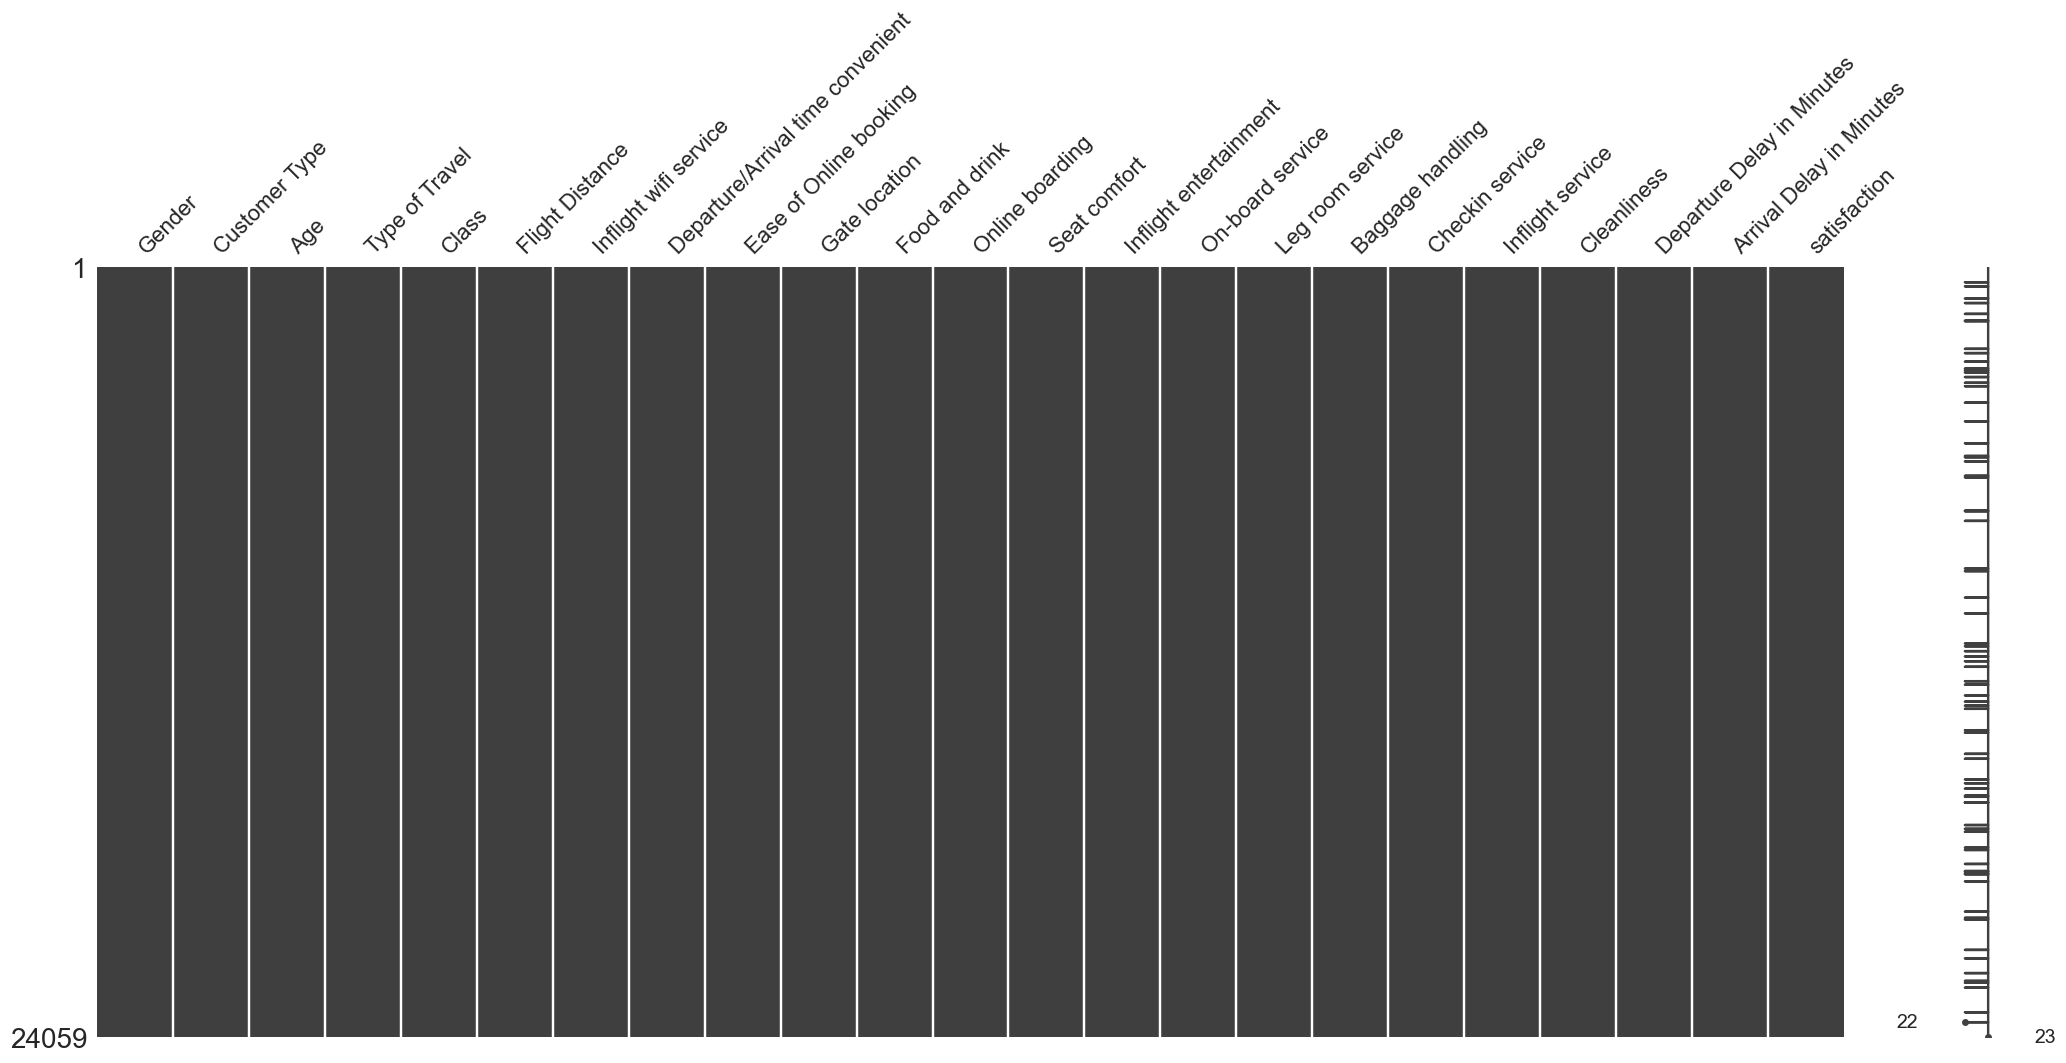

In [5]:
print('-' * 30)
print('Matrix of missing values :')
print('-' * 30)
mso.matrix(df_airlines)
plt.show()

Checking for missing values

In [6]:
df_airlines.isna().sum(axis=0)

Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             78
satisfaction                          0
dtype: int64

Deleting lines with missing values

In [7]:
df_airlines = df_airlines.dropna()
print("The total number of data-points after removing the rows with missing values are:", len(df_airlines))

The total number of data-points after removing the rows with missing values are: 23981


Finding the number of distinct values ​​in each column

In [8]:
print('-' * 30)
print('Number of distinct values :')
print('-' * 30)
for col in df_airlines:
    print(f"{col:20}\t{df_airlines[col].value_counts().count()}")

------------------------------
Number of distinct values :
------------------------------
Gender              	2
Customer Type       	2
Age                 	75
Type of Travel      	2
Class               	2
Flight Distance     	3274
Inflight wifi service	6
Departure/Arrival time convenient	6
Ease of Online booking	6
Gate location       	5
Food and drink      	6
Online boarding     	6
Seat comfort        	5
Inflight entertainment	6
On-board service    	6
Leg room service    	6
Baggage handling    	5
Checkin service     	5
Inflight service    	6
Cleanliness         	6
Departure Delay in Minutes	307
Arrival Delay in Minutes	316
satisfaction        	2


Сonverting categorical variables into numerical representations

In [9]:
s = (df_airlines.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

LE=LabelEncoder()
for i in object_cols:
    df_airlines[i]=df_airlines[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

print("Dataframe to be used for further modelling:")
df_airlines.head()

Categorical variables in the dataset: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'satisfaction']
All features are now numerical
Dataframe to be used for further modelling:


,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,52,0,1,160,5,4,3,4,...,5,5,5,5,2,5,5,50,44.0,1
1,0,0,36,0,0,2863,1,1,3,1,...,4,4,4,4,3,4,5,0,0.0,1
2,1,1,20,0,1,192,2,0,2,4,...,2,4,1,3,2,2,2,0,0.0,0
3,1,0,44,0,0,3377,0,0,0,2,...,1,1,1,1,3,1,4,0,6.0,1
4,0,0,49,0,1,1182,2,3,4,3,...,2,2,2,2,4,2,4,0,20.0,1


Finding the range of numbers in each column

In [10]:
print('-' * 30)
print('Range of numbers in each column :')
print('-' * 30)
print("".ljust(30), "Minimum".ljust(10), "Maximum".ljust(10))
for i in df_airlines.columns:
    print(i.ljust(30), str(df_airlines[i].min()).ljust(10), str(df_airlines[i].max()).ljust(10))

------------------------------
Range of numbers in each column :
------------------------------
                               Minimum    Maximum   
Gender                         0          1         
Customer Type                  0          1         
Age                            7          85        
Type of Travel                 0          1         
Class                          0          1         
Flight Distance                31         4983      
Inflight wifi service          0          5         
Departure/Arrival time convenient 0          5         
Ease of Online booking         0          5         
Gate location                  1          5         
Food and drink                 0          5         
Online boarding                0          5         
Seat comfort                   1          5         
Inflight entertainment         0          5         
On-board service               0          5         
Leg room service               0          5         


Standard Deviation output

In [11]:
std_deviation_values = df_airlines.std()

print('-' * 30)
print('Standard Deviation for each column:')
print('-' * 30)
print(std_deviation_values)

------------------------------
Standard Deviation for each column:
------------------------------
Gender                                  0.499987
Customer Type                           0.393183
Age                                    15.008565
Type of Travel                          0.454855
Class                                   0.499632
Flight Distance                      1016.929393
Inflight wifi service                   1.336263
Departure/Arrival time convenient       1.535711
Ease of Online booking                  1.413734
Gate location                           1.284329
Food and drink                          1.327679
Online boarding                         1.350029
Seat comfort                            1.312091
Inflight entertainment                  1.332447
On-board service                        1.274079
Leg room service                        1.310990
Baggage handling                        1.170746
Checkin service                         1.260000
Inflight service    

Variance output

In [12]:
variance_values = df_airlines.var()

print('-' * 30)
print('Variance for each column:')
print('-' * 30)
print(variance_values)

------------------------------
Variance for each column:
------------------------------
Gender                               2.499872e-01
Customer Type                        1.545932e-01
Age                                  2.252570e+02
Type of Travel                       2.068928e-01
Class                                2.496320e-01
Flight Distance                      1.034145e+06
Inflight wifi service                1.785599e+00
Departure/Arrival time convenient    2.358409e+00
Ease of Online booking               1.998645e+00
Gate location                        1.649500e+00
Food and drink                       1.762732e+00
Online boarding                      1.822579e+00
Seat comfort                         1.721584e+00
Inflight entertainment               1.775415e+00
On-board service                     1.623278e+00
Leg room service                     1.718696e+00
Baggage handling                     1.370646e+00
Checkin service                      1.587599e+00
Inflight ser

Distribution for each numeric variable

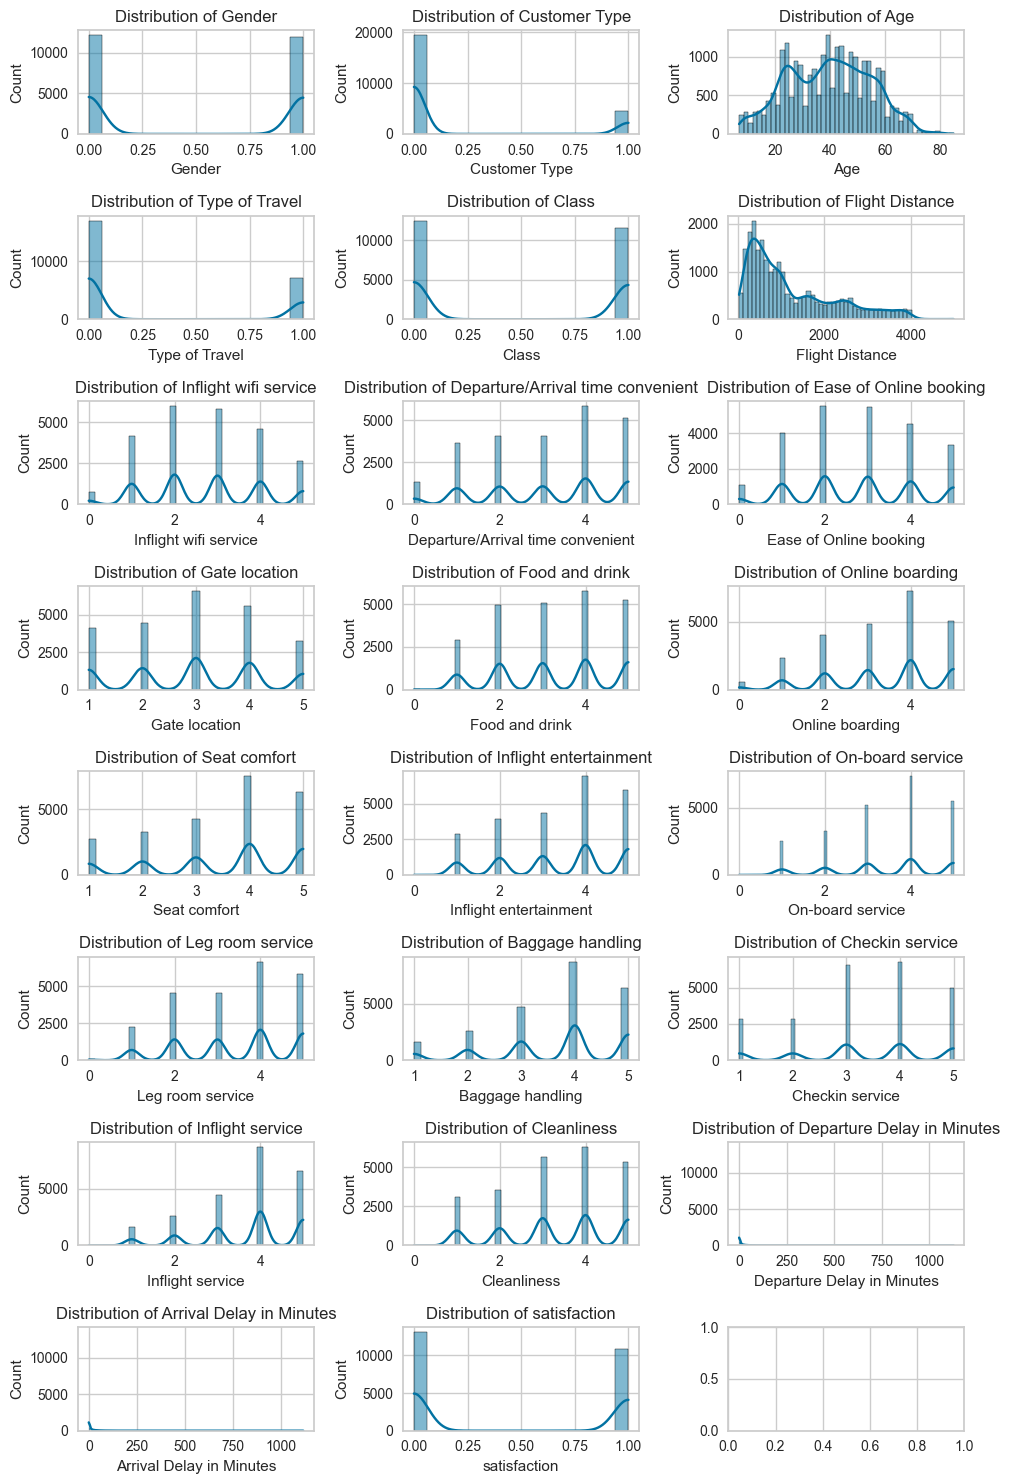

In [13]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df_airlines.replace([np.inf, -np.inf], np.nan, inplace=True)

fig, axes = plt.subplots(nrows=8, ncols=3, figsize=(10, 15))
axes = axes.flatten()

for i, col in enumerate(df_airlines.columns):
    sns.histplot(data=df_airlines, x=col, kde=True, ax=axes[i])
    axes[i].set_title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

Output box plot

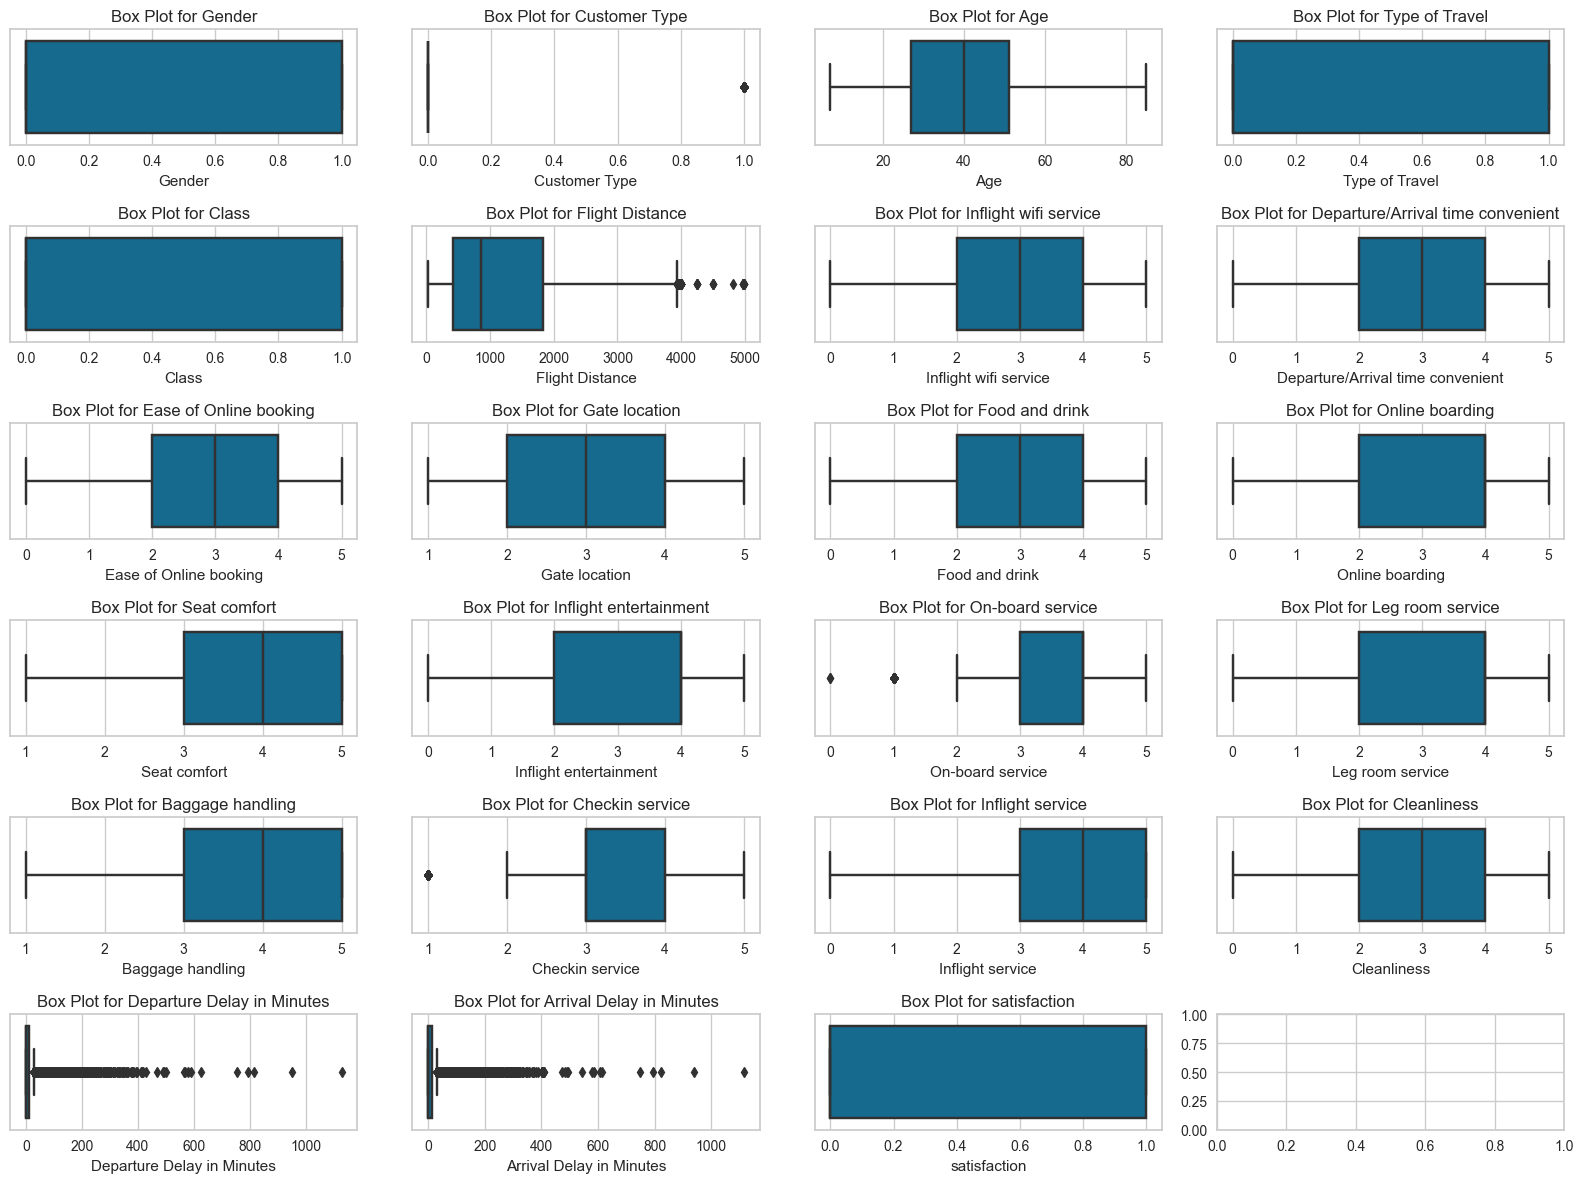

In [14]:
fig, axes = plt.subplots(nrows=6, ncols=4, figsize=(16, 12))

column_names = df_airlines.columns

for i, ax in enumerate(axes.ravel()):
    if i < len(column_names):
        sns.boxplot(data=df_airlines, x=column_names[i], ax=ax)
        ax.set_title(f'Box Plot for {column_names[i]}')

plt.tight_layout()
plt.show()

Reletive Plot Of Some Selected Features

<Figure size 800x550 with 0 Axes>

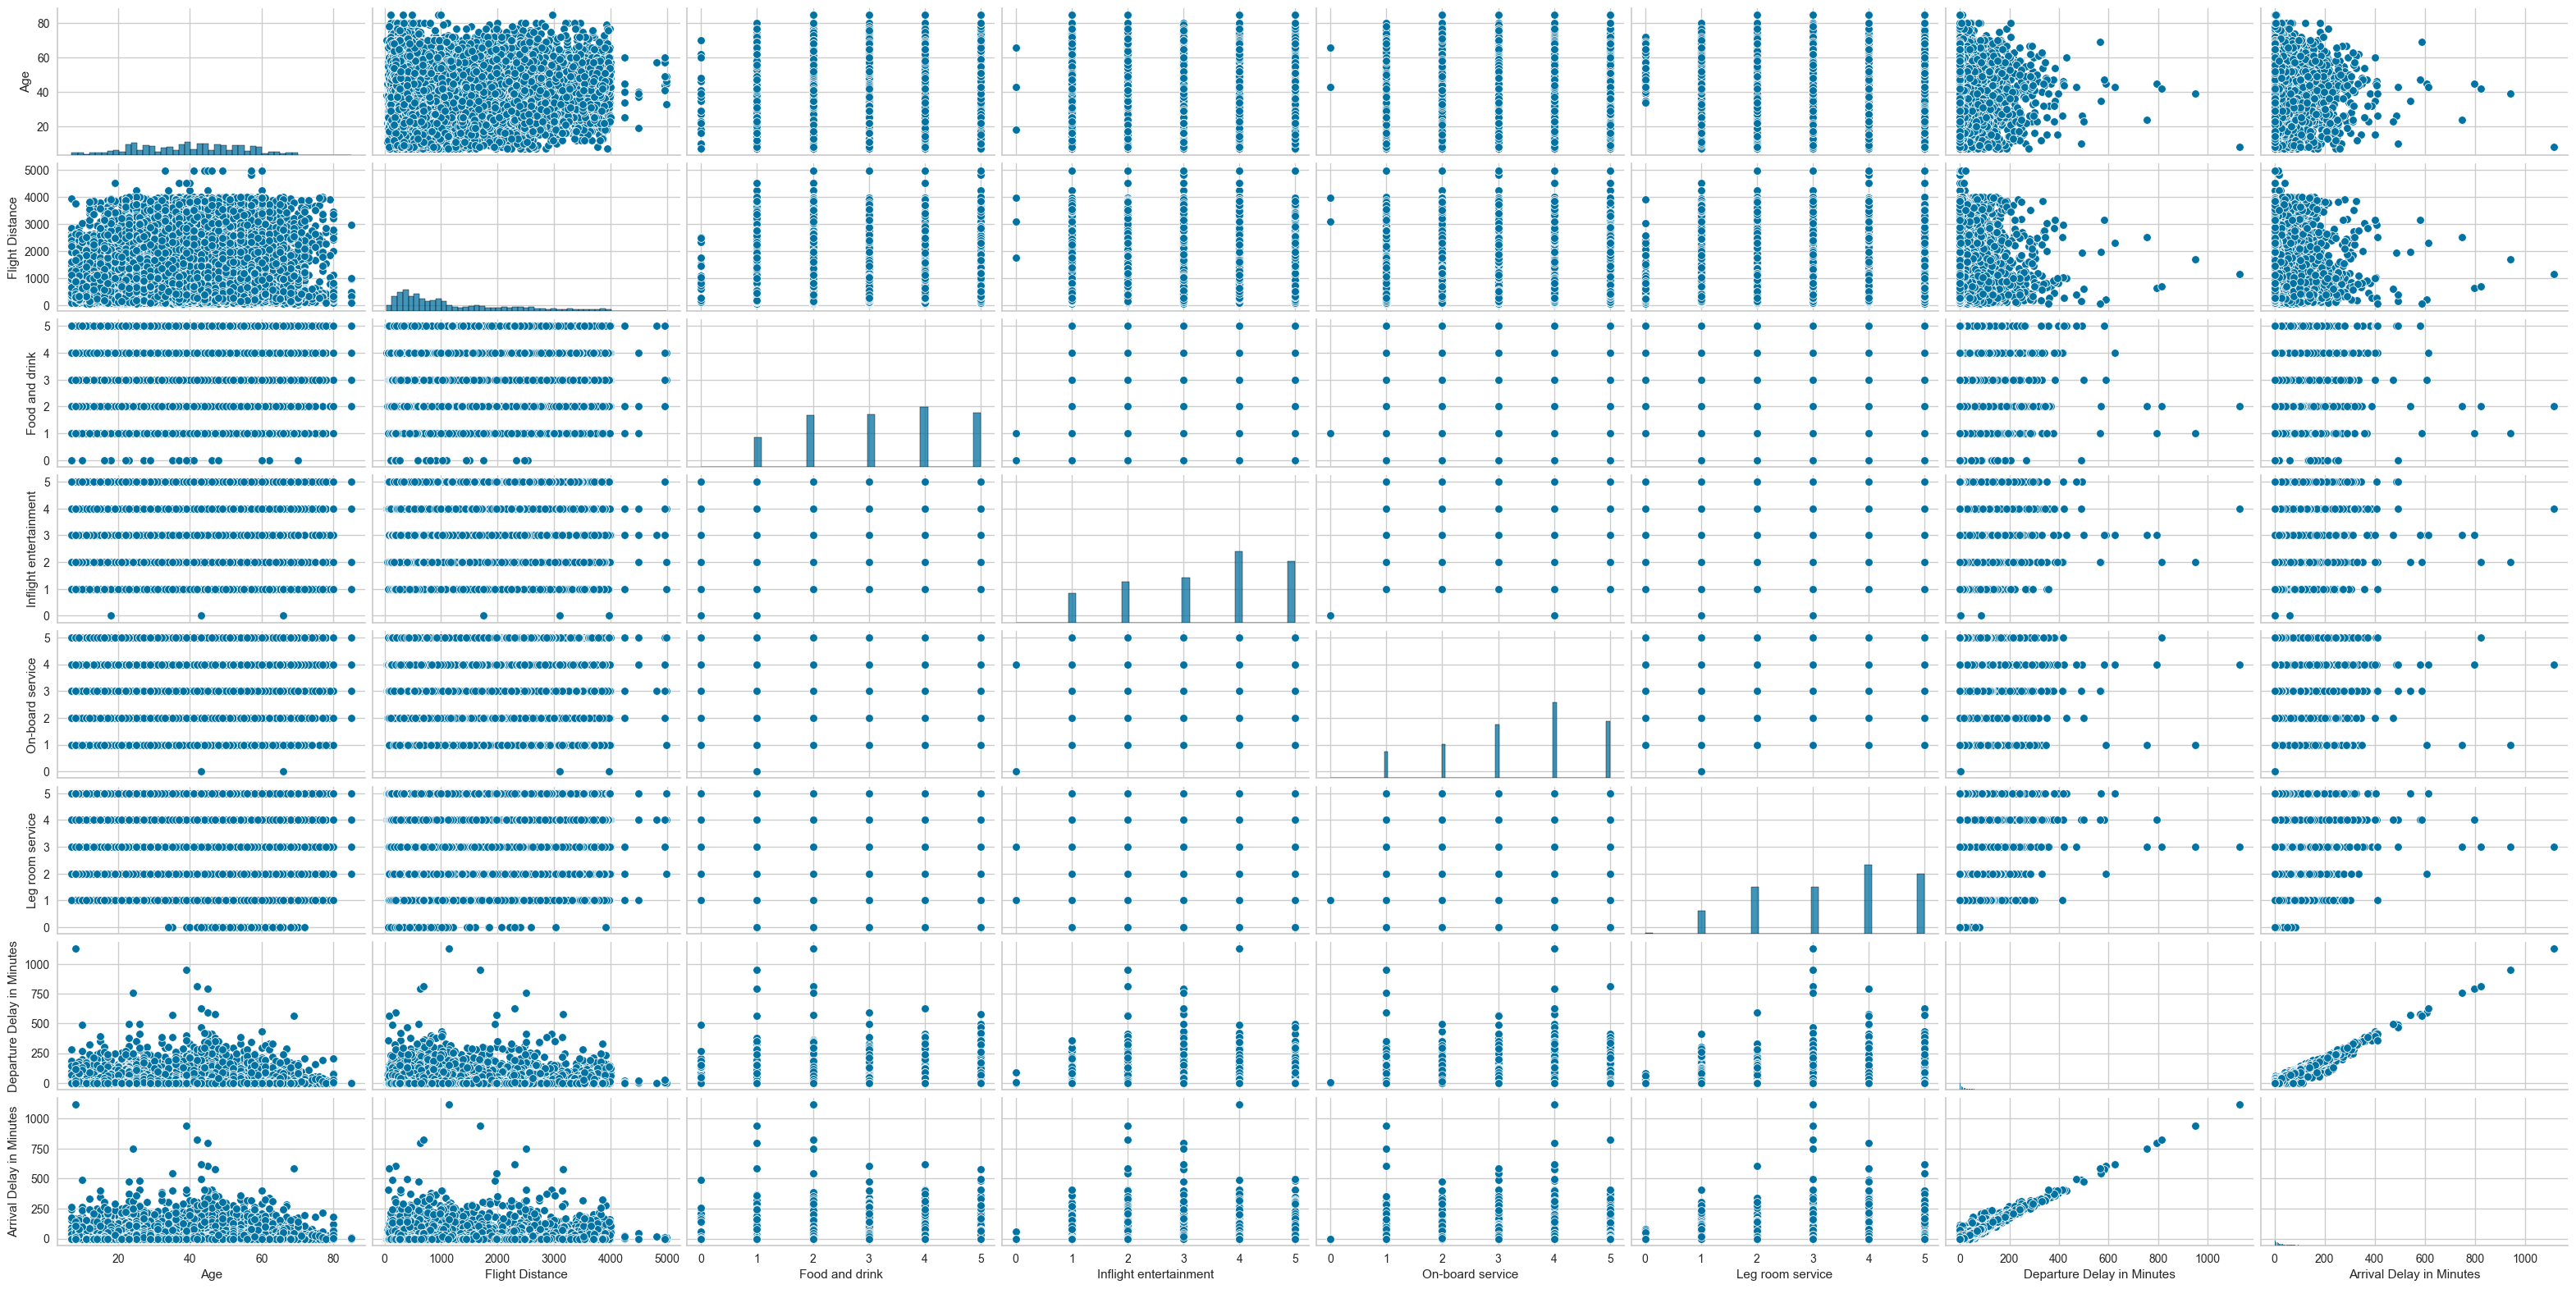

In [15]:
selected_columns = [ 'Age', 'Flight Distance',
                    'Food and drink', 'Inflight entertainment',
                    'On-board service', 'Leg room service', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

plt.figure()
sns.pairplot(df_airlines[selected_columns], height=2, aspect=2)
plt.show()

Scaling

In [16]:
scaler = StandardScaler()
scaler.fit(df_airlines)
scaled_ds = pd.DataFrame(scaler.transform(df_airlines),columns= df_airlines.columns )
print("All features are now scaled")

All features are now scaled


Distribution After Scaling

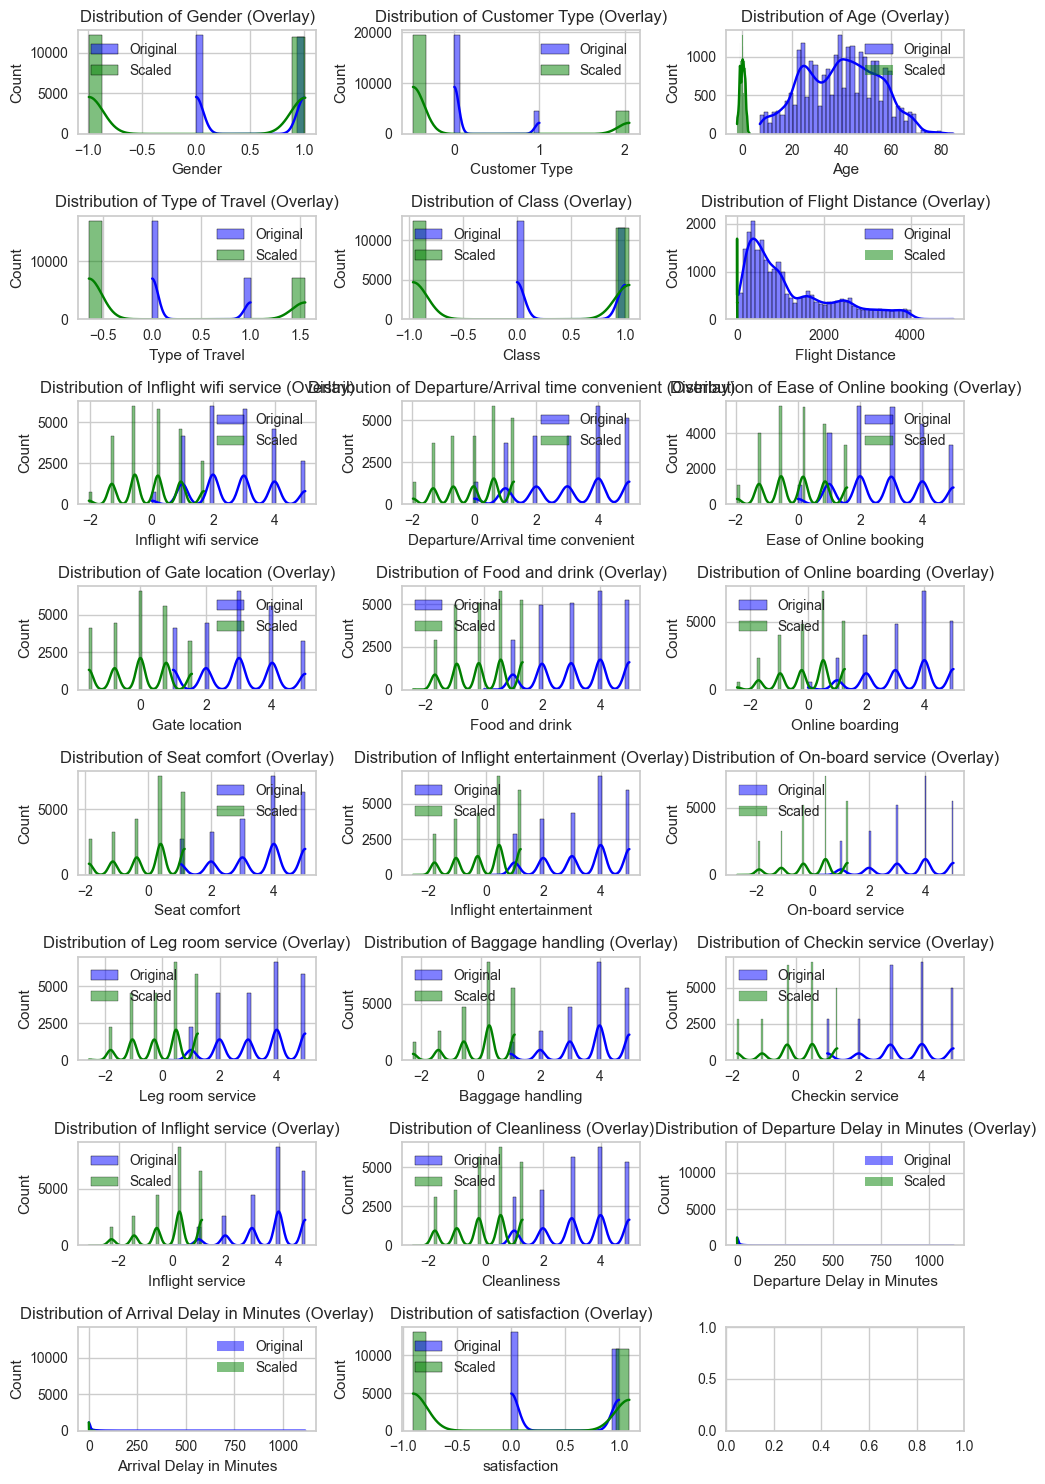

In [17]:
warnings.simplefilter(action='ignore', category=FutureWarning)
df_airlines.replace([np.inf, -np.inf], np.nan, inplace=True)

fig, axes_overlay = plt.subplots(nrows=8, ncols=3, figsize=(10, 15))
axes_overlay = axes_overlay.flatten()

for i, col in enumerate(df_airlines.columns):
    sns.histplot(data=df_airlines, x=col, kde=True, ax=axes_overlay[i], color='blue', label='Original')
    sns.histplot(data=scaled_ds, x=col, kde=True, ax=axes_overlay[i], color='green', label='Scaled')
    axes_overlay[i].set_title(f'Distribution of {col} (Overlay)')
    axes_overlay[i].legend()

plt.tight_layout()
plt.show()

Output a correlation matrix

In [18]:
correlation_matrix = df_airlines.corr()
correlation_matrix

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
Gender,1.000000,-0.019606,0.006961,0.018019,0.003757,-0.008143,-0.007414,0.005247,0.000335,-0.006474,...,-0.007187,-0.000807,0.024256,0.029928,0.000535,0.030398,-0.011205,0.006581,0.006438,0.004515
Customer Type,-0.019606,1.000000,-0.307391,-0.304030,0.108825,-0.246251,0.004996,-0.205947,-0.011377,-0.004654,...,-0.101189,-0.050054,-0.052742,0.024412,-0.029938,0.027154,-0.080768,0.002555,0.003921,-0.190515
Age,0.006961,-0.307391,1.000000,-0.035756,-0.147360,0.109225,0.006920,0.030164,0.012717,0.002192,...,0.073978,0.060004,0.041399,-0.046165,0.025372,-0.057996,0.049073,-0.008182,-0.009536,0.131268
Type of Travel,0.018019,-0.304030,-0.035756,1.000000,0.573589,-0.273513,-0.106828,0.245341,-0.136585,-0.022191,...,-0.175186,-0.084685,-0.151721,-0.046847,0.000715,-0.038436,-0.107225,-0.003650,-0.001860,-0.455188
Class,0.003757,0.108825,-0.147360,0.573589,1.000000,-0.456852,-0.040871,0.081909,-0.115560,-0.012923,...,-0.212508,-0.226136,-0.220105,-0.171003,-0.156274,-0.159379,-0.155891,0.011780,0.016303,-0.503336
Flight Distance,-0.008143,-0.246251,0.109225,-0.273513,-0.456852,1.000000,0.004919,-0.012070,0.062647,0.008949,...,0.139284,0.113653,0.138528,0.065058,0.068948,0.061352,0.107287,0.002762,0.000539,0.298711
Inflight wifi service,-0.007414,0.004996,0.006920,-0.106828,-0.040871,0.004919,1.000000,0.370287,0.725807,0.371976,...,0.189479,0.116583,0.158772,0.122728,0.047342,0.114807,0.111452,-0.008663,-0.010385,0.268730
Departure/Arrival time convenient,0.005247,-0.205947,0.030164,0.245341,0.081909,-0.012070,0.370287,1.000000,0.446881,0.466515,...,-0.022363,0.056016,0.004752,0.062555,0.077485,0.062667,-0.007362,-0.001283,-0.002662,-0.061049
Ease of Online booking,0.000335,-0.011377,0.012717,-0.136585,-0.115560,0.062647,0.725807,0.446881,1.000000,0.470366,...,0.046857,0.043972,0.115620,0.044050,0.004818,0.038997,0.011718,-0.002346,-0.004292,0.160896
Gate location,-0.006474,-0.004654,0.002192,-0.022191,-0.012923,0.008949,0.371976,0.466515,0.470366,1.000000,...,-0.002572,-0.029340,-0.000891,-0.003588,-0.051595,-0.003231,-0.017397,0.005985,0.005404,-0.018624


Output a heatmap

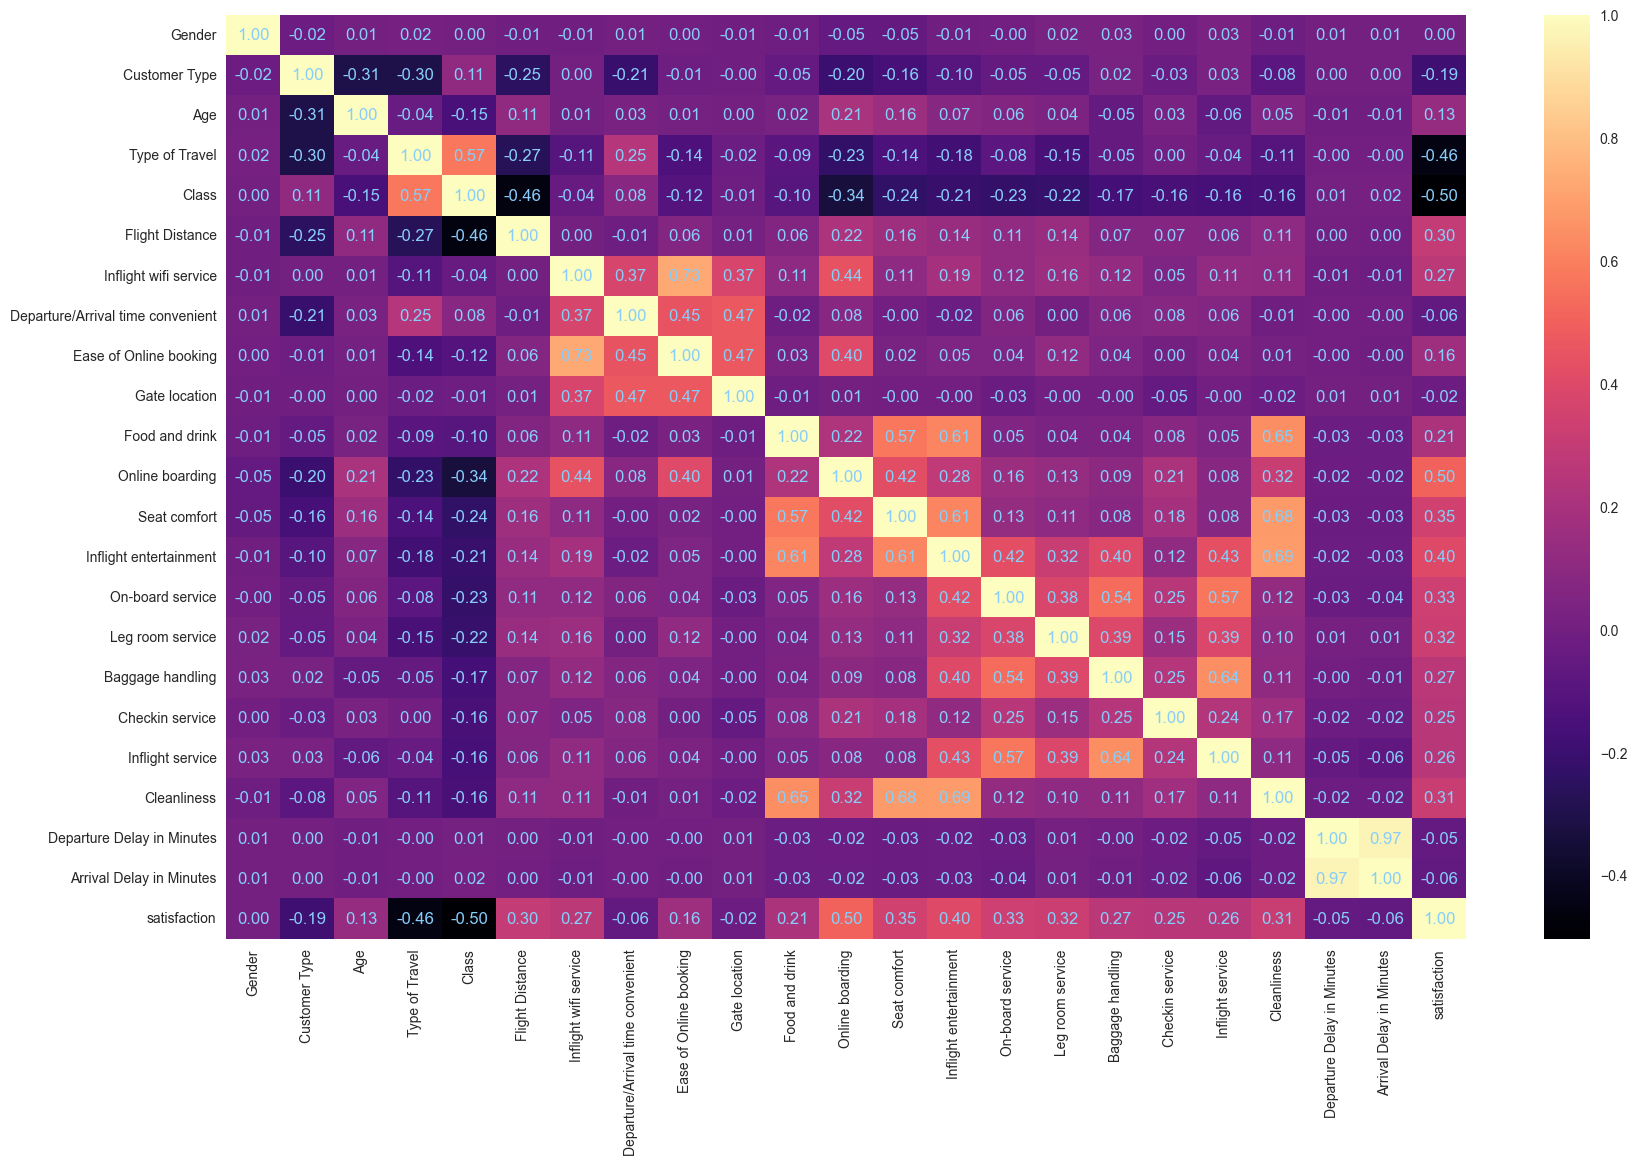

In [23]:
plt.figure(figsize=(20, 12))

sns.heatmap(correlation_matrix, cmap="magma", annot=False)

for i in range(correlation_matrix.shape[0]):
    for j in range(correlation_matrix.shape[1]):
        plt.text(j + 0.5, i + 0.5, f'{correlation_matrix.iloc[i, j]:.2f}', ha="center", va="center", color="#87CEFA", size=12)

plt.show()

PCA

In [20]:
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,23981.0,1.019251e-16,2.143116,-4.837072,-1.811456,0.072344,1.699790,5.729206
col2,23981.0,-9.422150e-17,1.566945,-4.055836,-1.188103,-0.034302,1.148182,4.934973
col3,23981.0,-3.540714e-17,1.487603,-4.476707,-1.008741,-0.062794,0.938096,4.751075


A 3D Projection Of Data In The Reduced Dimension

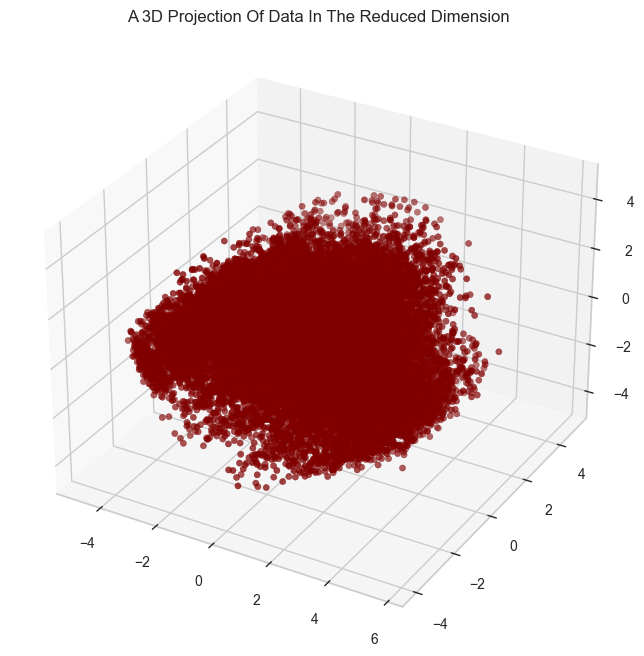

In [21]:
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]

fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="maroon", marker="o" )
ax.set_title("A 3D Projection Of Data In The Reduced Dimension")
plt.show()

Elbow Method to determine the number of clusters to be formed

Elbow Method to determine the number of clusters to be formed:


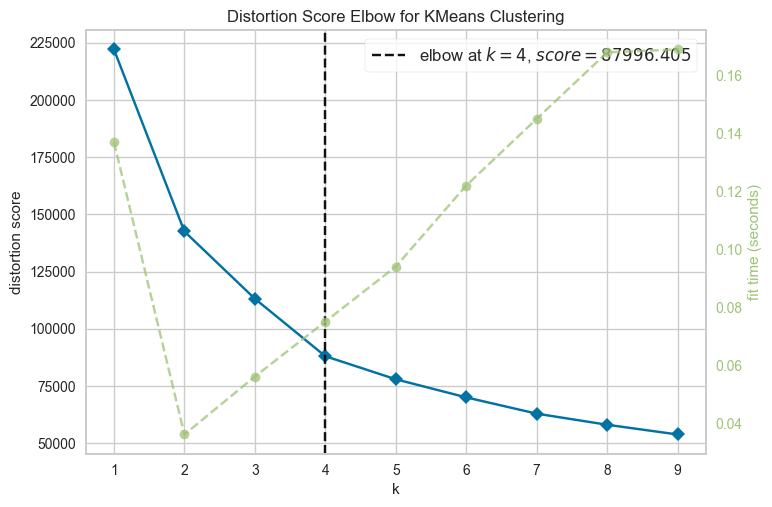

Optimal number of clusters: 4


In [22]:
print('Elbow Method to determine the number of clusters to be formed:')

model = KMeans()
elbow_visualizer = KElbowVisualizer(model, k=(1, 10))

elbow_visualizer.fit(PCA_ds)

elbow_visualizer.show()
optimal_k = elbow_visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")